In [28]:
import pandas as pd
import numpy as np

import os

In [29]:
sbl = pd.read_csv(os.getcwd() + '\\..\\..\\data\\final\\UnverifiedLabelFinal.csv')
sbl

,ObjectOfInterest,Disposition,OrbitalPeriod,TransitDuration,TransitDepth,PlanetEarthRadius,PlanetEquilibriumTemperature,PlanetInsolationValue,StellarEffectiveTemperature,StellarLogG,StellarSunRadius,RightAscension,Declination,PlanetType,PlanetName
0,K00010.01,CFRM,3.522498,3.19843,9145.7,14.59,1521.0,1264.67,6225.0,4.169,1.451,281.28812,42.451080,Gas Giant,Kepler-8 b
1,K00791.01,CFRM,12.611904,5.14970,6105.6,7.40,753.0,76.15,5795.0,4.508,0.919,289.11221,51.737381,Gas Giant,Kepler-682 b
2,K00813.01,CFRM,3.895937,2.31110,8544.8,7.34,1005.0,241.62,5557.0,4.592,0.774,294.65524,39.308361,Gas Giant,Kepler-688 b
3,K00801.01,CFRM,1.625522,2.38963,7969.0,9.73,1579.0,1467.41,5539.0,4.322,1.106,293.87192,38.422939,Gas Giant,Kepler-685 b
4,K00806.02,CFRM,60.324942,6.61880,20280.0,12.19,411.0,6.77,5485.0,4.556,0.867,285.28363,38.947281,Gas Giant,Kepler-30 c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12848,K00097.01,CFRM,4.885489,5.16165,7458.4,16.66,1496.0,1182.79,6036.0,3.968,1.909,288.58151,41.089809,Gas Giant,Kepler-7 b
12849,K04301.01,CFRM,15.604841,4.54300,73.4,1.57,1013.0,248.62,6254.0,4.019,1.706,298.20261,44.925831,Super Earth,Kepler-1586 b
12850,K04772.02,CFRM,9.019471,5.92000,191.6,1.07,789.0,91.74,5775.0,4.590,0.768,301.57855,44.312180,Neptune-like,Kepler-1705 b
12851,K03470.02,CFRM,25.433786,6.51400,302.0,2.00,667.0,46.80,5806.0,4.321,1.158,283.79782,46.931000,Super Earth,Kepler-1509 b


# Equations

## Star Properties

#### Star Mass
$m_{s} = \frac{r^2 10^{SLogG}}{100G}$

#### Star Density
$\rho_{star} = \frac{3 * 10^{SLogG}}{400G\pi}$

#### Star Luminosity
$L = 4\pi r^2_{star} \sigma T^4_{star}$

#### Star Peak Wavelength
$\lambda_{peak} = \frac{2900000}{T}$


## Planet Properties

#### Planet Density (Approx Circular Orbit)
$\rho_{planet} \approx \frac{\frac{4\pi a^3}{GP^2} - \sqrt[3.5]{4\pi r^2_{star} \sigma T^4_{star}}}{4/3 \pi r_{planet}^3}$

#### Distance from star and planet (Approx Circular Orbit) 
$r_{Star, Planet} \approx  P^{2/3}$

#### Planet Surface Gravity
$F_{g, surface} = G\frac{m_{planet}}{r_{planet}^2}$




In [30]:
def classify_star(row):
    if row['StellarEffectiveTemperature'] >= 30000:
        row['StarClassification'] = 'O'
    elif row['StellarEffectiveTemperature'] >= 10000:
        row['StarClassification'] = 'B'
    elif row['StellarEffectiveTemperature'] >= 7500:
        row['StarClassification'] = 'A'
    elif row['StellarEffectiveTemperature'] >= 6000:
        row['StarClassification'] = 'F'
    elif row['StellarEffectiveTemperature'] >= 5200:
        row['StarClassification'] = 'G'
    elif row['StellarEffectiveTemperature'] >= 3700:
        row['StarClassification'] = 'K'
    elif row['StellarEffectiveTemperature'] >= 2400:
        row['StarClassification'] = 'M'
    return row

def determine_main_seq(row):
    if row['StarClassification'] == 'O':
        if row['StellarSunRadius'] >= 6.6:
            row['MainSequence'] = 1
        else:
            row['MainSequence'] = 0
    elif row['StarClassification'] == 'B':
        if 1.8 <= row['StellarSunRadius'] <= 6.6:
            row['MainSequence'] = 1
        else:
            row['MainSequence'] = 0
    elif row['StarClassification'] == 'A':
        if 1.4 <= row['StellarSunRadius'] <= 1.8:
            row['MainSequence'] = 1
        else:
            row['MainSequence'] = 0
    elif row['StarClassification'] == 'F':
        if 1.15 <= row['StellarSunRadius'] <= 1.4:
            row['MainSequence'] = 1
        else:
            row['MainSequence'] = 0
    elif row['StarClassification'] == 'G':
        if 0.96 <= row['StellarSunRadius'] <= 1.15:
            row['MainSequence'] = 1
        else:
            row['MainSequence'] = 0
    elif row['StarClassification'] == 'K':
        if 0.7 <= row['StellarSunRadius'] <= 0.96:
            row['MainSequence'] = 1
        else:
            row['MainSequence'] = 0
    elif row['StarClassification'] == 'M':
        if row['StellarSunRadius'] <= 0.7:
            row['MainSequence'] = 1
        else:
            row['MainSequence'] = 0
    return row

In [32]:
newtonG = 6.67408e-11 
sbS = 5.670e-8

sbl = pd.read_csv(os.getcwd() + '\\..\\..\\data\\final\\UnverifiedLabelFinal.csv')

# Conversion to Emperical Units
sbl['StarRadius'] = sbl['StellarSunRadius'] * 6.96340e8  # Convert to Meters
sbl['PlanetRadius'] = sbl['PlanetEarthRadius'] * 6.371e6 # Convert to Meters
sbl['StarSurfaceG'] = (10**sbl['StellarLogG']) / 100     # Convert to m/s^2
sbl['PeriodInSeconds'] = 86400 * sbl['OrbitalPeriod']    # Convert to Earth Seconds


# Conversion of Needed Components
sbl['StarPlanetDistance'] = 1.498e11 * (sbl['OrbitalPeriod'] / 365.25)**(2/3)    # Out -> AU :-> m
sbl['StarMass'] = (sbl['StarSurfaceG']  * sbl['StarRadius']**2) / (newtonG)  # Out -> Kg

# Calculation of Star different values
sbl['StarWavelengthPeak'] = (2900000) / sbl['StellarEffectiveTemperature']       # Out -> nm
sbl['StarSunDiameter'] = (2 * sbl['StarRadius']) / (3.19e9)

## How to show the Density vs Size Value?


# Calculation of Planet different values
sbl['PlanetEarthVolume'] = (4/3) * np.pi * sbl['PlanetRadius'] / (1.08321e12)

# Classify Stars and MainSequence Stars
sbl = sbl.apply(classify_star, axis=1).apply(determine_main_seq, axis=1)

# Convert Measures into Simple / SI / Ratio units
sbl['StarPlanetDistance'] = sbl['StarPlanetDistance'] / 1.498e11
sbl['StarWavelengthPeak'] = sbl['StarWavelengthPeak'] / 500
sbl['PlanetEarthTemperature'] = sbl['PlanetEquilibriumTemperature'] / 255
sbl['StarSunMass'] = sbl['StarMass'] / 1.989e30
sbl['OrbitalPeriod'] = sbl['OrbitalPeriod'] / 365.25

# Remove Used Features

sbl.drop(columns=[
    'StarRadius',
    'PlanetRadius',
    'StellarSunRadius',
    'PlanetEarthRadius',
    'StellarEffectiveTemperature',
    'StarPlanetDistance',
    'StellarLogG',
    'StarSurfaceG',
    'PeriodInSeconds',
    'StarMass',
    'PlanetEquilibriumTemperature',
    'StarWavelengthPeak',   
    # Suspected Not Needed
    'PlanetInsolationValue',
    'RightAscension',
    'Declination'
], inplace=True)

# Convert to CSV
sbl.to_csv(os.getcwd()+'\\..\\..\\data\\final\\modelling.csv', index=False)

sbl

,ObjectOfInterest,Disposition,OrbitalPeriod,TransitDuration,TransitDepth,PlanetType,PlanetName,StarSunDiameter,PlanetEarthVolume,StarClassification,MainSequence,PlanetEarthTemperature,StarSunMass
0,K00010.01,CFRM,0.009644,3.19843,9145.7,Gas Giant,Kepler-8 b,0.633473,0.000359,F,0,5.964706,1.134884
1,K00791.01,CFRM,0.034530,5.14970,6105.6,Gas Giant,Kepler-682 b,0.401214,0.000182,G,0,2.952941,0.993682
2,K00813.01,CFRM,0.010666,2.31110,8544.8,Gas Giant,Kepler-688 b,0.337910,0.000181,G,0,3.941176,0.855261
3,K00801.01,CFRM,0.004450,2.38963,7969.0,Gas Giant,Kepler-685 b,0.482854,0.000240,G,1,6.192157,0.937836
4,K00806.02,CFRM,0.165161,6.61880,20280.0,Gas Giant,Kepler-30 c,0.378512,0.000300,G,0,1.611765,0.987767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12848,K00097.01,CFRM,0.013376,5.16165,7458.4,Gas Giant,Kepler-7 b,0.833425,0.000410,F,0,5.866667,1.236597
12849,K04301.01,CFRM,0.042724,4.54300,73.4,Super Earth,Kepler-1586 b,0.744800,0.000039,F,0,3.972549,1.110643
12850,K04772.02,CFRM,0.024694,5.92000,191.6,Neptune-like,Kepler-1705 b,0.335291,0.000026,G,0,3.094118,0.838183
12851,K03470.02,CFRM,0.069634,6.51400,302.0,Super Earth,Kepler-1509 b,0.505556,0.000049,G,0,2.615686,1.025731


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer

# Criteria: VIF Must be less than 5

classif_map = {
    'M': 0, 'K': 1, 'G': 2, 'F': 3, 'A': 4, 'B': 5, 'O': 6
}

vif = pd.DataFrame()
temp = sbl.copy()
temp['StarClassification'] = temp['StarClassification'].map(classif_map)

numerics = [col for col in temp.columns if temp[col].dtype != object]

temp = temp[numerics]

for col in temp.columns:
    temp[col] = PowerTransformer().fit_transform(temp[col].values.reshape(-1,1))

# temp.drop(columns=['StarClassification', 'PlanetEarthMass', 'StellarSunSize', 'TransitDepth', 'PlanetEquilibriumTemperature', 'StellarEffectiveTemperature', 'PlanetEarthSize', 'StellarSunLuminosity', 'StellarSunRadius','OrbitalPeriod', 'DistanceFromStarCoreinKm', 'StellarLogG', 'StellarG', 'PlanetEarthRadius', 'PlanetInsolationValue','Declination', 'RightAscension'], inplace=True)

vif['VIF Factor'] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif['features'] = temp.columns

vif.sort_values(by='VIF Factor', ascending=False)

,VIF Factor,features
7,8.181992,PlanetEarthTemperature
0,6.303455,OrbitalPeriod
3,4.450316,StarSunDiameter
8,4.415406,StarSunMass
4,2.114251,PlanetEarthVolume
5,1.963272,StarClassification
2,1.831315,TransitDepth
1,1.597830,TransitDuration
6,1.093321,MainSequence


In [38]:
modelling = sbl.copy()

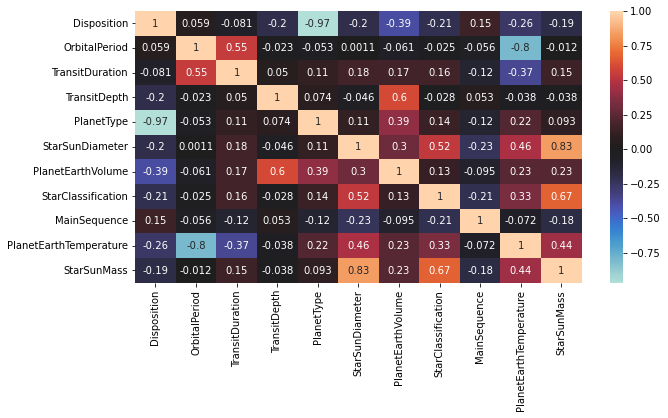

1.5638661927263503e-07
KstestResult(statistic=0.19629136219464155, pvalue=0.0)


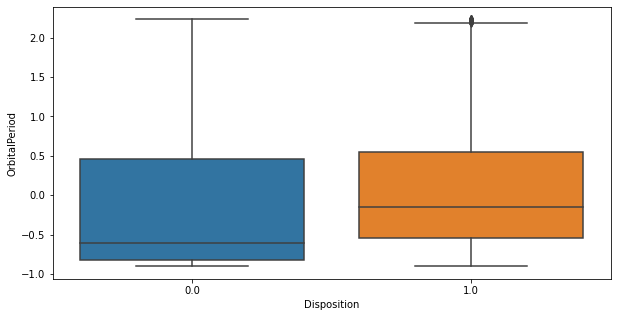

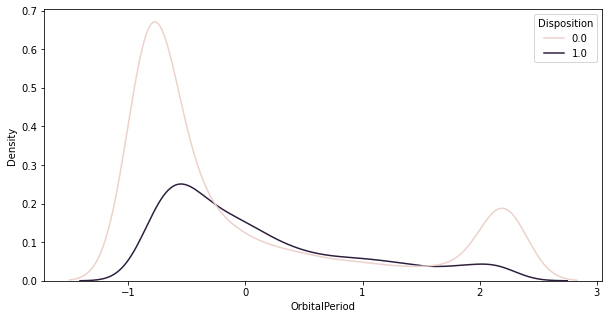

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, kstest

from sklearn.preprocessing import LabelEncoder

disp_map = {
    'CFRM': 1, 'FPOS': 0
}

cor_df = modelling.copy()

cor_df['Disposition'] = cor_df['Disposition'].map(disp_map)
cor_df['PlanetType'] = LabelEncoder().fit_transform(cor_df['PlanetType'])

cor_df = cor_df.drop(columns=[col for col in cor_df.columns if cor_df[col].dtype == object])

corr = cor_df.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, center=0.0)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='Disposition', y='OrbitalPeriod', data=cor_df)
print(ttest_ind(cor_df[cor_df['Disposition']==0]['OrbitalPeriod'], cor_df[cor_df['Disposition']==1]['OrbitalPeriod']).pvalue)
print(kstest(cor_df['OrbitalPeriod'], 'norm'))
plt.show()

plt.figure(figsize=(10,5))
sns.kdeplot(x='OrbitalPeriod', hue='Disposition',  data=cor_df)
plt.show()

In [39]:
modelling.to_csv(os.getcwd()+'\\..\\..\\data\\final\\modelling.csv', index=False)